In [2]:
import pandas as pd
import numpy as np
import ast
import random
import os
import sys
sys.path.append('../..')
from modules.many_features import utils, constants
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)

#### X test df

In [4]:
df = pd.read_csv('../../data/more_features/more_feats_new_labels_0.1_noisy_0.6.csv')
#df = df.fillna(-1)
class_dict = constants.CLASS_DICT
df['label'] = df['label'].replace(class_dict)
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
X_test_df = pd.concat([X_test, y_test], axis=1)
X_test_df = X_test_df.reset_index(drop=True)
X_test_df.head()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional in

,hemoglobin,ferritin,ret_count,segmented_neutrophils,tibc,mcv,serum_iron,rbc,age,gender,indirect_bilirubin,transferrin,creatinine,cholestrol,copper,ethanol,folate,glucose,label
0,10.349960,-1.000000,0.998554,-1.0,-1.000000,86.411147,111.707488,4.944340,27.502990,0,0.279290,157.791243,0.728968,19.372712,51.439289,43.598944,7.558525,64.723397,6
1,6.859704,305.139323,1.169502,-1.0,106.333555,95.125054,-1.000000,5.097877,57.787603,1,2.908458,-1.000000,-1.000000,-1.000000,-1.000000,57.254153,-1.000000,-1.000000,2
2,10.726840,-1.000000,-1.000000,0.0,-1.000000,101.259302,-1.000000,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2
3,9.126403,353.363040,1.514899,-1.0,299.684880,77.109609,203.806921,3.691072,44.381796,0,1.518567,444.995942,-1.000000,85.974431,95.398276,58.902609,27.090162,-1.000000,5
4,9.721776,-1.000000,3.116853,-1.0,-1.000000,91.022674,-1.000000,-1.000000,-1.000000,1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5


#### The test dfs

In [5]:
dqn_test_df = pd.read_csv('../../test_dfs/many_features/0.1/test_df3_noisy_6_12000000.csv')
dqn_test_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
0,4.0,0.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Aplastic a...",6.0,6.0
1,3.0,1.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'Unspecified anemia']",2.0,2.0
2,5.0,2.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",2.0,2.0
3,5.0,3.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'gender', 'Anemi...",5.0,3.0
4,4.0,4.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Hemolytic ...",5.0,5.0


In [6]:
dqn_test_df[dqn_test_df.y_actual==dqn_test_df.y_pred].y_pred.value_counts()

0.0    1931
3.0    1617
1.0    1428
2.0    1424
4.0    1303
7.0     890
6.0     820
5.0     671
Name: y_pred, dtype: int64

In [7]:
dt_test_df = pd.read_csv('../../test_dfs/many_features/0.1/dt_test_df_6.csv')
dt_test_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,y_pred
0,4.0,0.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Aplastic a...",6.0,6.0
1,4.0,1.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Aplastic a...",2.0,6.0
2,4.0,2.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",2.0,2.0
3,4.0,3.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'ferritin', 'Anemia of c...",5.0,3.0
4,4.0,4.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Hemolytic ...",5.0,5.0


In [8]:
test_df = dqn_test_df.copy()
test_df = test_df.rename({'y_pred': 'dqn_y_pred'}, axis=1)
test_df['dt_y_pred'] = dt_test_df['y_pred']
test_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,dqn_y_pred,dt_y_pred
0,4.0,0.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Aplastic a...",6.0,6.0,6.0
1,3.0,1.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'Unspecified anemia']",2.0,2.0,6.0
2,5.0,2.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'segmented_neutrophils',...",2.0,2.0,2.0
3,5.0,3.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'gender', 'Anemi...",5.0,3.0,3.0
4,4.0,4.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Hemolytic ...",5.0,5.0,5.0


In [9]:
test_df.y_actual.value_counts()

0.0    2000
3.0    1951
4.0    1853
2.0    1807
6.0    1804
1.0    1800
5.0    1795
7.0     990
Name: y_actual, dtype: int64

In [10]:
test_df[test_df.y_actual==test_df.dqn_y_pred].dt_y_pred.value_counts()

0.0    1931
7.0    1592
3.0    1414
5.0    1309
4.0    1163
6.0     970
1.0     860
2.0     845
Name: dt_y_pred, dtype: int64

#### Episodes where DQN performs better than DT agent

In [11]:
better_dqn_df = test_df[(test_df.y_actual==test_df.dqn_y_pred) & (test_df.y_actual!=test_df.dt_y_pred)]
better_dqn_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,dqn_y_pred,dt_y_pred
1,3.0,1.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'Unspecified anemia']",2.0,2.0,6.0
8,4.0,8.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'Iron deficiency...",4.0,4.0,3.0
9,4.0,9.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'ret_count', 'Aplastic a...",6.0,6.0,5.0
13,3.0,13.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'Unspecified anemia']",2.0,2.0,5.0
28,4.0,28.0,1.0,1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'Anemia of chron...",3.0,3.0,7.0


In [12]:
len(better_dqn_df)

2594

In [16]:
better_dqn_df.dt_y_pred.value_counts()

5.0    778
7.0    702
3.0    434
6.0    399
4.0    281
Name: dt_y_pred, dtype: int64

In [17]:
better_dqn_df.dqn_y_pred.value_counts()

3.0    637
2.0    579
1.0    568
4.0    421
6.0    249
5.0    140
Name: dqn_y_pred, dtype: int64

In [18]:
better_dqn_df[better_dqn_df.y_actual==6].dt_y_pred.value_counts()

5.0    236
3.0     13
Name: dt_y_pred, dtype: int64

In [19]:
utils.confusion_matrix(better_dqn_df['y_actual'], better_dqn_df['dt_y_pred'])

array([[  0,   0,   0,   0, 178,  80, 310],
       [  0,   0,   0,   0, 285, 139, 155],
       [  0,   0,   0, 281,  79,  40, 237],
       [  0,   0, 421,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 140,   0],
       [  0,   0,  13,   0, 236,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=int64)

In [38]:
def plot_confusion_matrix(y_actual, y_pred, save=False, filename=False):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(y_actual, y_pred)
    #cm_df = pd.DataFrame(cm, index = list(constants.CLASS_DICT.keys())[1:], columns = list(constants.CLASS_DICT.keys())[1:])
    cm_df = pd.DataFrame(cm, index = list(constants.CLASS_DICT.keys()), columns = list(constants.CLASS_DICT.keys()))
    plt.figure(figsize=(8, 6))
    ax=sns.heatmap(cm_df, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Anemia')
    plt.xlabel('Predicted Anemia')
    #plt.tight_layout()
    if save:
        plt.savefig(filename)
    plt.show()
    #plt.close()

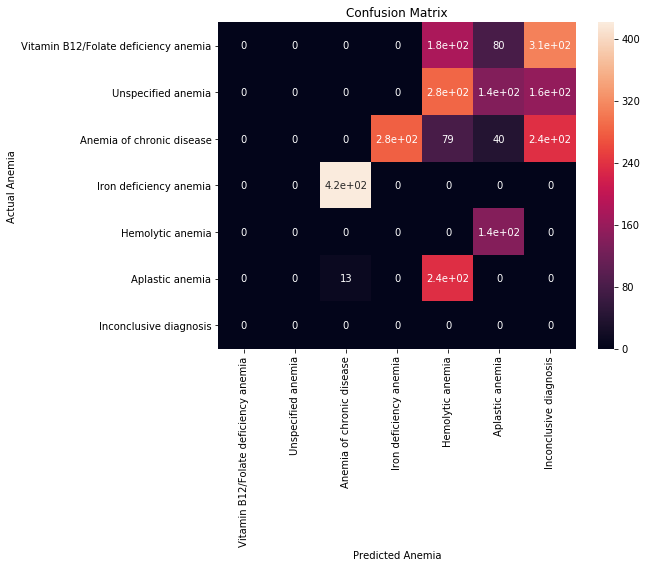

In [25]:
plot_confusion_matrix(better_dqn_df['y_actual'], better_dqn_df['dt_y_pred'])

In [26]:
better_dqn_df[better_dqn_df.y_actual==2].trajectory.value_counts()

['hemoglobin', 'mcv', 'Unspecified anemia']              529
['hemoglobin', 'gender', 'mcv', 'Unspecified anemia']     50
Name: trajectory, dtype: int64

#### Episodes where DT agent is better than DQN

In [27]:
better_dt_df = test_df[(test_df.y_actual!=test_df.dqn_y_pred) & (test_df.y_actual==test_df.dt_y_pred)]
better_dt_df.head()

,episode_length,index,is_success,reward,terminated,trajectory,y_actual,dqn_y_pred,dt_y_pred
5,4.0,5.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'Anemia of chron...",6.0,3.0,6.0
11,4.0,11.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'Anemia of chron...",7.0,3.0,7.0
18,4.0,18.0,0.0,-1.0,0.0,"['hemoglobin', 'gender', 'mcv', 'Vitamin B12/F...",7.0,1.0,7.0
20,4.0,20.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'Anemia of chron...",5.0,3.0,5.0
36,4.0,36.0,0.0,-1.0,0.0,"['hemoglobin', 'mcv', 'tibc', 'Iron deficiency...",5.0,4.0,5.0


In [28]:
len(better_dt_df)

1189

In [29]:
better_dt_df.dt_y_pred.value_counts()

5.0    332
6.0    312
3.0    208
4.0    158
7.0    100
0.0     69
1.0      7
2.0      3
Name: dt_y_pred, dtype: int64

In [30]:
better_dqn_df.dqn_y_pred.value_counts()

3.0    637
2.0    579
1.0    568
4.0    421
6.0    249
5.0    140
Name: dqn_y_pred, dtype: int64

In [31]:
test_df[(test_df.y_actual==2) & (test_df.dqn_y_pred!=2)].dt_y_pred.value_counts()

7.0    377
2.0      3
6.0      2
5.0      1
Name: dt_y_pred, dtype: int64

#### Shorter DQN paths

In [34]:
shorters_df = test_df.copy()
shorters_df = shorters_df.rename({'trajectory':'dqn_trajectory', 'episode_length':'dqn_length'}, axis=1)
shorters_df['dt_trajectory'] = dt_test_df['trajectory']
shorters_df['dt_length'] = dt_test_df['episode_length']
shorters_df = shorters_df.drop(['index', 'reward'], axis=1)
shorters_df['dt_trajectory'] = shorters_df['dt_trajectory'].apply(lambda x: ast.literal_eval(x))
shorters_df['dqn_trajectory'] = shorters_df['dqn_trajectory'].apply(lambda x: ast.literal_eval(x))
shorters_df.head()

,dqn_length,is_success,terminated,dqn_trajectory,y_actual,dqn_y_pred,dt_y_pred,dt_trajectory,dt_length
0,4.0,1.0,0.0,"[hemoglobin, mcv, ret_count, Aplastic anemia]",6.0,6.0,6.0,"[hemoglobin, mcv, ret_count, Aplastic anemia]",4.0
1,3.0,1.0,0.0,"[hemoglobin, mcv, Unspecified anemia]",2.0,2.0,6.0,"[hemoglobin, mcv, ret_count, Aplastic anemia]",4.0
2,5.0,1.0,0.0,"[hemoglobin, mcv, segmented_neutrophils, gende...",2.0,2.0,2.0,"[hemoglobin, mcv, segmented_neutrophils, Unspe...",4.0
3,5.0,0.0,0.0,"[hemoglobin, mcv, tibc, gender, Anemia of chro...",5.0,3.0,3.0,"[hemoglobin, mcv, ferritin, Anemia of chronic ...",4.0
4,4.0,1.0,0.0,"[hemoglobin, mcv, ret_count, Hemolytic anemia]",5.0,5.0,5.0,"[hemoglobin, mcv, ret_count, Hemolytic anemia]",4.0


In [35]:
shorters_dqn_df = pd.DataFrame()
for i, row in shorters_df.iterrows():
    if len(row.dqn_trajectory) < len(row.dt_trajectory):
        #if row.dqn_y_pred == row.y_actual:
        shorters_dqn_df = shorters_dqn_df.append(row)
shorters_dqn_df.head()

,dqn_length,dqn_trajectory,dqn_y_pred,dt_length,dt_trajectory,dt_y_pred,is_success,terminated,y_actual
1,3.0,"[hemoglobin, mcv, Unspecified anemia]",2.0,4.0,"[hemoglobin, mcv, ret_count, Aplastic anemia]",6.0,1.0,0.0,2.0
13,3.0,"[hemoglobin, mcv, Unspecified anemia]",2.0,4.0,"[hemoglobin, mcv, ret_count, Hemolytic anemia]",5.0,1.0,0.0,2.0
15,2.0,"[hemoglobin, No anemia]",0.0,5.0,"[hemoglobin, gender, mcv, ret_count, Inconclus...",7.0,0.0,0.0,1.0
18,4.0,"[hemoglobin, gender, mcv, Vitamin B12/Folate d...",1.0,5.0,"[hemoglobin, gender, mcv, ret_count, Inconclus...",7.0,0.0,0.0,7.0
19,4.0,"[hemoglobin, mcv, tibc, tibc]",7.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Inconclusive...",7.0,1.0,1.0,7.0


In [36]:
assert shorters_dqn_df.y_actual.tolist() == shorters_dqn_df.dqn_y_pred.tolist()

AssertionError: 

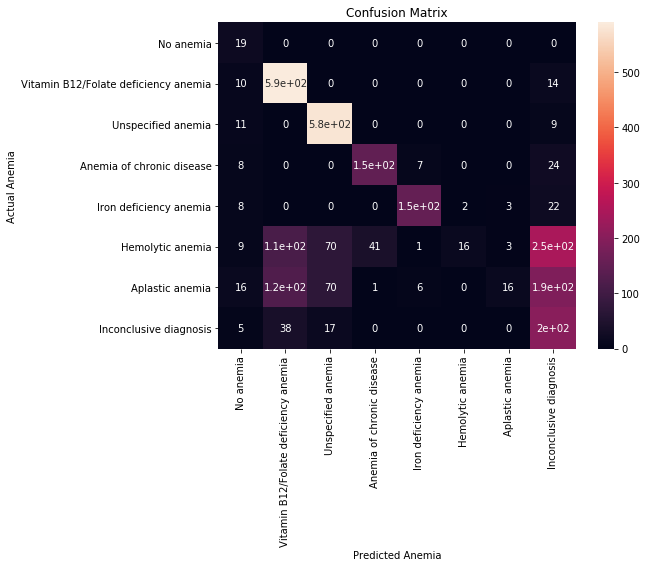

In [39]:
plot_confusion_matrix(shorters_dqn_df['y_actual'], shorters_dqn_df['dqn_y_pred'])

../..\modules\many_features\utils.py:337: MatplotlibDeprecationWarning:


The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.

../..\modules\many_features\utils.py:338: MatplotlibDeprecationWarning:


The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.

../..\modules\many_features\utils.py:340: MatplotlibDeprecationWarning:


The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.

../..\modules\many_features\utils.py:341: MatplotlibDeprecationWarning:


The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.



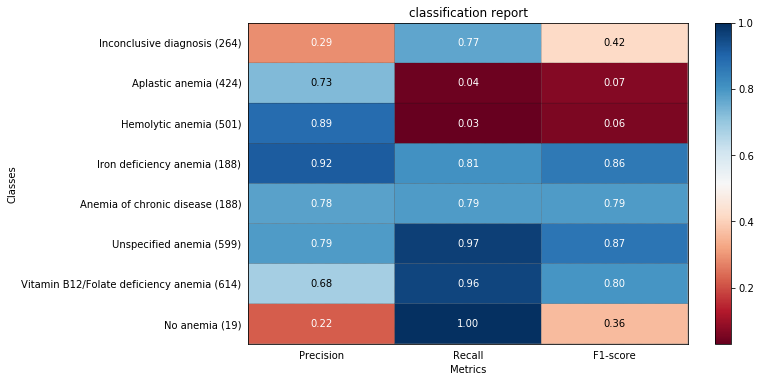

In [40]:
utils.plot_classification_report(shorters_dqn_df['y_actual'], shorters_dqn_df['dqn_y_pred'])

In [132]:
shorters_dqn_df.dqn_y_pred.value_counts()

4.0    376
3.0    221
7.0    206
0.0      4
Name: dqn_y_pred, dtype: int64

In [143]:
shorter_dqn_df_1 = shorters_dqn_df[shorters_dqn_df.dqn_y_pred==7]
shorter_dqn_df_1.head()

,dqn_length,dqn_trajectory,dqn_y_pred,dt_length,dt_trajectory,dt_y_pred,is_success,terminated,y_actual
19,4.0,"[hemoglobin, mcv, tibc, tibc]",7.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Inconclusive...",7.0,1.0,1.0,7.0
109,4.0,"[hemoglobin, mcv, tibc, tibc]",7.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Inconclusive...",7.0,1.0,1.0,7.0
160,4.0,"[hemoglobin, mcv, tibc, tibc]",7.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Inconclusive...",7.0,1.0,1.0,7.0
280,4.0,"[hemoglobin, mcv, tibc, tibc]",7.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Inconclusive...",7.0,1.0,1.0,7.0
423,4.0,"[hemoglobin, mcv, tibc, tibc]",7.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Inconclusive...",7.0,1.0,1.0,7.0


In [144]:
shorter_dqn_df_1.tail()

,dqn_length,dqn_trajectory,dqn_y_pred,dt_length,dt_trajectory,dt_y_pred,is_success,terminated,y_actual
13739,4.0,"[hemoglobin, mcv, tibc, tibc]",7.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Inconclusive...",7.0,1.0,1.0,7.0
13798,4.0,"[hemoglobin, mcv, tibc, tibc]",7.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Inconclusive...",7.0,1.0,1.0,7.0
13889,4.0,"[hemoglobin, mcv, tibc, tibc]",7.0,5.0,"[hemoglobin, mcv, ferritin, tibc, Inconclusive...",7.0,1.0,1.0,7.0
13927,5.0,"[hemoglobin, gender, mcv, tibc, tibc]",7.0,6.0,"[hemoglobin, gender, mcv, ferritin, tibc, Inco...",7.0,1.0,1.0,7.0
13974,5.0,"[hemoglobin, gender, mcv, tibc, tibc]",7.0,6.0,"[hemoglobin, gender, mcv, ferritin, tibc, Inco...",7.0,1.0,1.0,7.0


In [145]:
len(shorter_dqn_df_1)

206

In [146]:
shorter_dqn_df_1.dqn_length.unique()

array([4., 5.])

In [147]:
cols = ['hemoglobin', 'mcv', 'ferritin', 'tibc']
X_test_df.iloc[shorter_dqn_df_1.index][cols].describe()

,hemoglobin,mcv,ferritin,tibc
count,206.000000,206.000000,206.000000,206.0
mean,9.103139,77.660438,54.018694,-1.0
std,1.981084,1.437473,30.524661,0.0
min,6.007535,75.019171,-1.000000,-1.0
25%,7.397929,76.362390,38.785502,-1.0
50%,9.032317,77.662521,57.179748,-1.0
75%,10.597366,78.916288,78.649531,-1.0
max,12.975106,79.996259,99.469007,-1.0


In [ ]:
X_test_df.iloc[17]

In [ ]:
shorter_dqn_df_1.tail()

In [ ]:
shorter_dqn_df_1[shorter_dqn_df_1.dqn_length==5]

In [ ]:
shorter_dqn_df_1.dqn_length.unique()

In [ ]:
# shorter_dqn_df_1[shorter_dqn_df_1.dqn_length==4].dt_length.unique()

In [ ]:
X_test_df.iloc[shorter_dqn_df_1.index].describe()

In [ ]:
analytics_test_df =shorter_dqn_df_1[shorter_dqn_df_1.dqn_length==3]
analytics_test_df.head()

In [ ]:
index_list = list(analytics_test_df.index)
analytics_x_test_df = X_test_df.iloc[index_list]
analytics_x_test_df.describe()

In [ ]:
shorter_dqn_df_1.dqn_trajectory.value_counts()